<a href="https://colab.research.google.com/github/Shrey-patel-07/Image-Augmentation/blob/main/Digit_Recogniser.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

In [101]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [ ]:
Y_train = train["label"]
X_train = train.drop(labels = ["label"], axis = 1)
del train
Y_train.value_counts()

In [5]:
X_train.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [6]:
X_train = X_train / 255.0
test = test / 255.0

In [7]:
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [8]:
Y_train = to_categorical(Y_train, num_classes = 10)

In [9]:
random_seed = 2

In [10]:
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [12]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the CNN model
def create_digit_recognizer_model():
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output of the convolutional layers
    model.add(layers.Flatten())

    # Fully connected layers
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes (digits 0-9)

    return model

# Create the model
model = create_digit_recognizer_model()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [13]:
epochs = 30 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

In [14]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [16]:
history = model.fit(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 1, steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/30
439/439 [==============================] - 30s 69ms/step - loss: 0.1544 - accuracy: 0.9534 - val_loss: 0.0844 - val_accuracy: 0.9743
Epoch 2/30
439/439 [==============================] - 29s 66ms/step - loss: 0.1119 - accuracy: 0.9664 - val_loss: 0.0788 - val_accuracy: 0.9752
Epoch 3/30
439/439 [==============================] - 33s 76ms/step - loss: 0.0855 - accuracy: 0.9731 - val_loss: 0.0432 - val_accuracy: 0.9862
Epoch 4/30
439/439 [==============================] - 29s 66ms/step - loss: 0.0704 - accuracy: 0.9784 - val_loss: 0.0474 - val_accuracy: 0.9850
Epoch 5/30
439/439 [==============================] - 29s 65ms/step - loss: 0.0636 - accuracy: 0.9803 - val_loss: 0.0493 - val_accuracy: 0.9852
Epoch 6/30
439/439 [==============================] - 29s 67ms/step - loss: 0.0562 - accuracy: 0.9827 - val_loss: 0.0323 - val_accuracy: 0.9905
Epoch 7/30
439/439 [==============================] - 30s 69ms/step - loss: 0.0520 - accuracy: 0.9832 - val_loss: 0.0394 - val_accuracy:

In [ ]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [36]:
y_pred = model.predict(X_val)

132/132 [==============================] - 1s 7ms/step


In [37]:
y_pred_class = np.argmax(y_pred, axis = 1)

In [21]:
Y_trueval = np.argmax(Y_val, axis = 1)

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_pred_class, Y_trueval)

In [39]:
cm

array([[410,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0, 483,   0,   0,   1,   0,   1,   0,   0,   0],
       [  0,   0, 403,   1,   0,   0,   0,   3,   0,   0],
       [  0,   0,   0, 415,   0,   2,   0,   0,   0,   0],
       [  0,   0,   0,   0, 458,   0,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0, 366,   0,   0,   0,   0],
       [  1,   0,   0,   0,   0,   2, 410,   0,   0,   0],
       [  0,   1,   0,   0,   0,   0,   0, 443,   0,   1],
       [  0,   1,   0,   2,   0,   0,   2,   0, 382,   0],
       [  0,   0,   0,   0,   2,   1,   0,   0,   0, 407]])

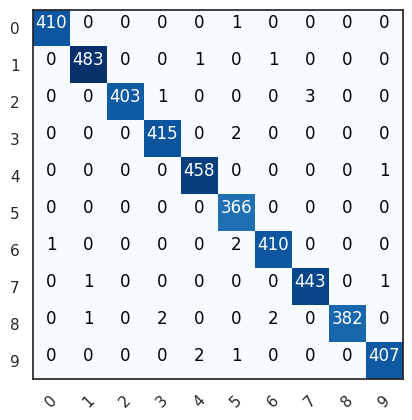

In [40]:
plt.imshow(cm, cmap = plt.cm.Blues)
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10), rotation=45)
plt.yticks(tick_marks, range(10))
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black")

In [47]:
errors = (y_pred_class - Y_trueval) != 0

In [ ]:
Y_pred_class_error = y_pred_class[errors]
Y_pred_error = y_pred[errors]
Y_true_errors = Y_trueval[errors]
X_val_errors = X_val[errors]
X_val_errors

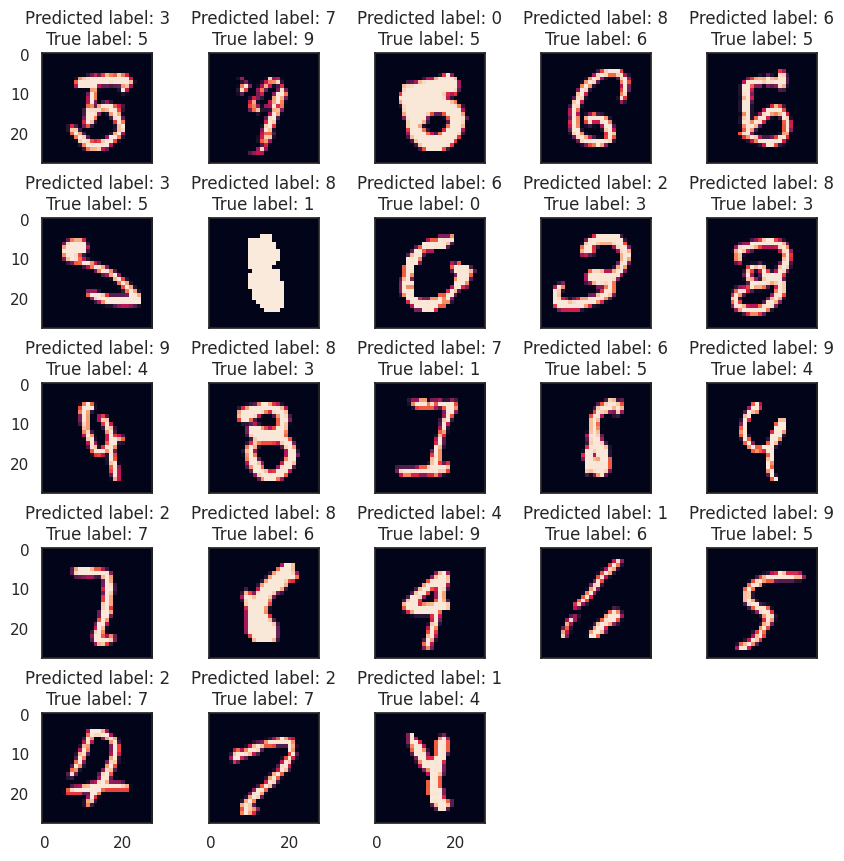

In [93]:
num = 0
fig, ax = plt.subplots(5, 5, sharex=True, sharey=True, figsize=(10, 10))
for i in range(5):
    for j in range(5):
        if num >= 23:
            ax[i, j].axis('off')
        else:
            ax[i, j].imshow(X_val_errors[num].reshape(28, 28))
            ax[i, j].set_title("Predicted label: {}\nTrue label: {}".format(Y_pred_class_error[num], Y_true_errors[num]))
            num += 1
plt.subplots_adjust(wspace=0.5, hspace=0.5)
plt.show()